# Auto mpg01 Classification
## Junyu Hou

In [10]:
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [11]:
data_path = Path("data") / "Data-Auto.csv"
df_auto = pd.read_csv(data_path)
print(df_auto.shape)
print(df_auto.head)

# Construct a binary variable mpg01
mpg_median = df_auto["mpg"].median()
df_auto["mpg01"] = np.where(df_auto["mpg"] >= mpg_median, 1, 0)

(392, 10)
<bound method NDFrame.head of      Unnamed: 0   mpg  cylinders  displacement  horsepower  weight  \
0             1  18.0          8         307.0         130    3504   
1             2  15.0          8         350.0         165    3693   
2             3  18.0          8         318.0         150    3436   
3             4  16.0          8         304.0         150    3433   
4             5  17.0          8         302.0         140    3449   
..          ...   ...        ...           ...         ...     ...   
387         393  27.0          4         140.0          86    2790   
388         394  44.0          4          97.0          52    2130   
389         395  32.0          4         135.0          84    2295   
390         396  28.0          4         120.0          79    2625   
391         397  31.0          4         119.0          82    2720   

     acceleration  year  origin                       name  
0            12.0    70       1  chevrolet chevelle malibu

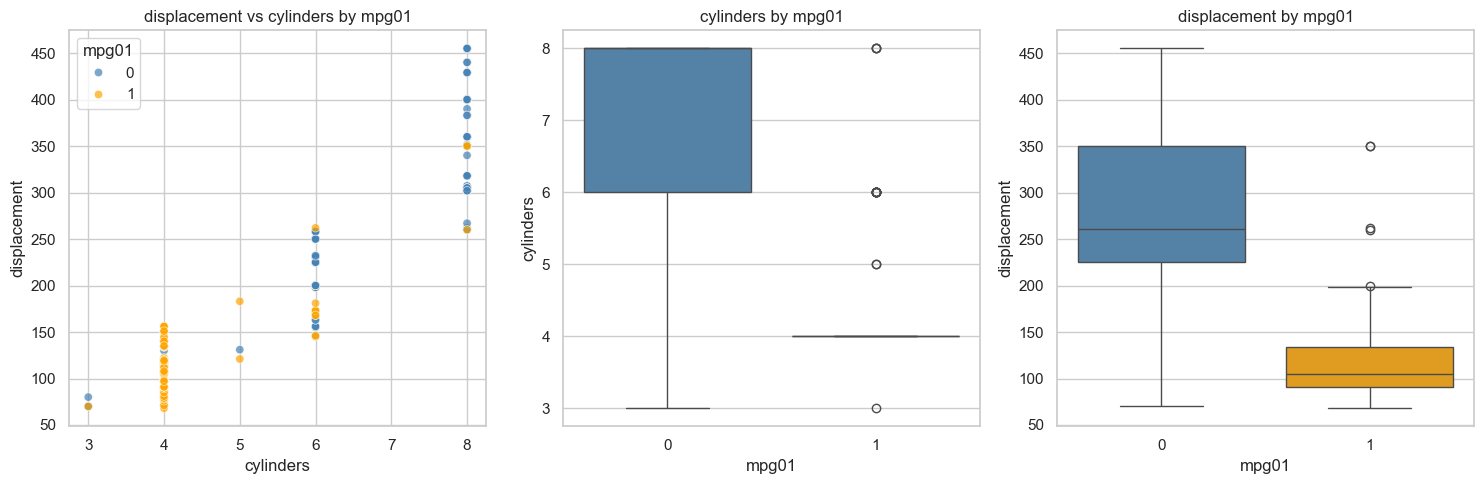

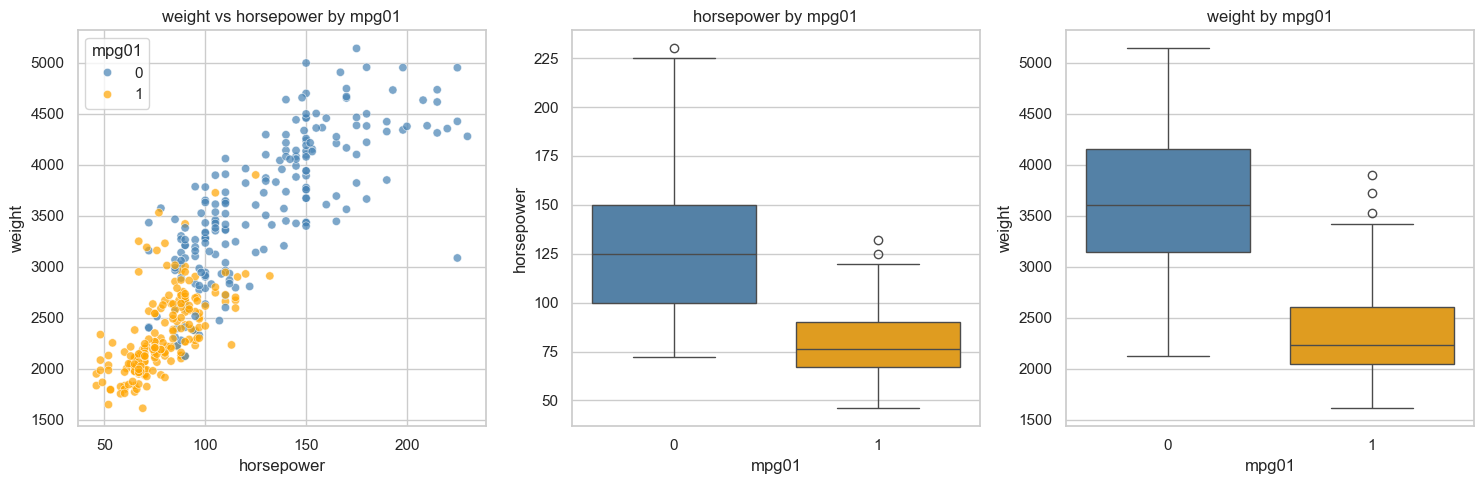

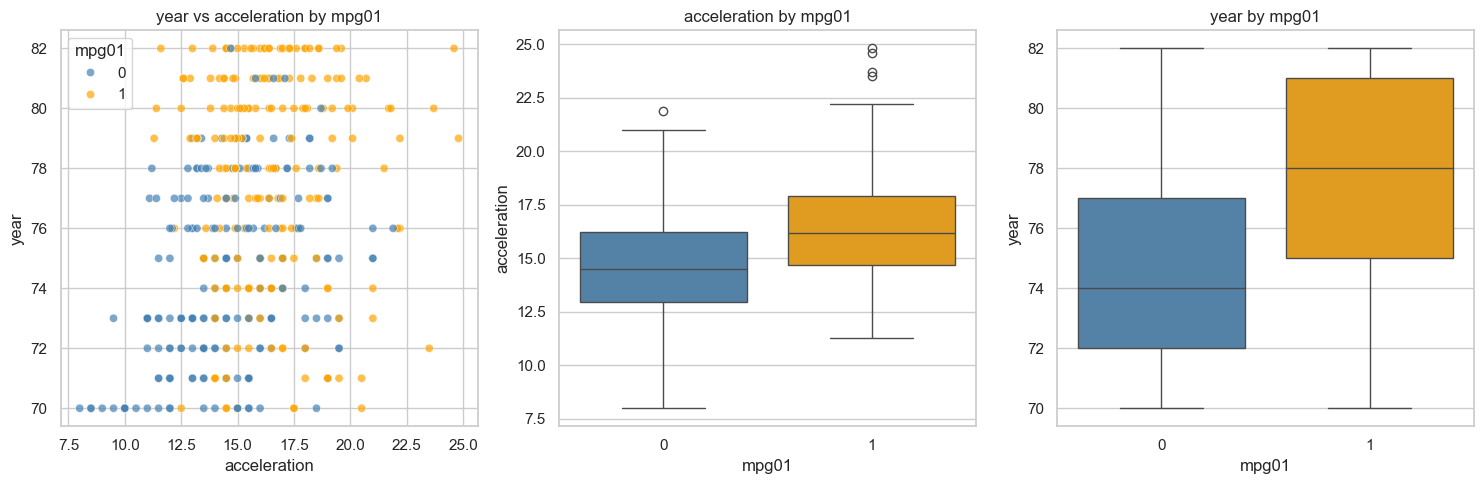

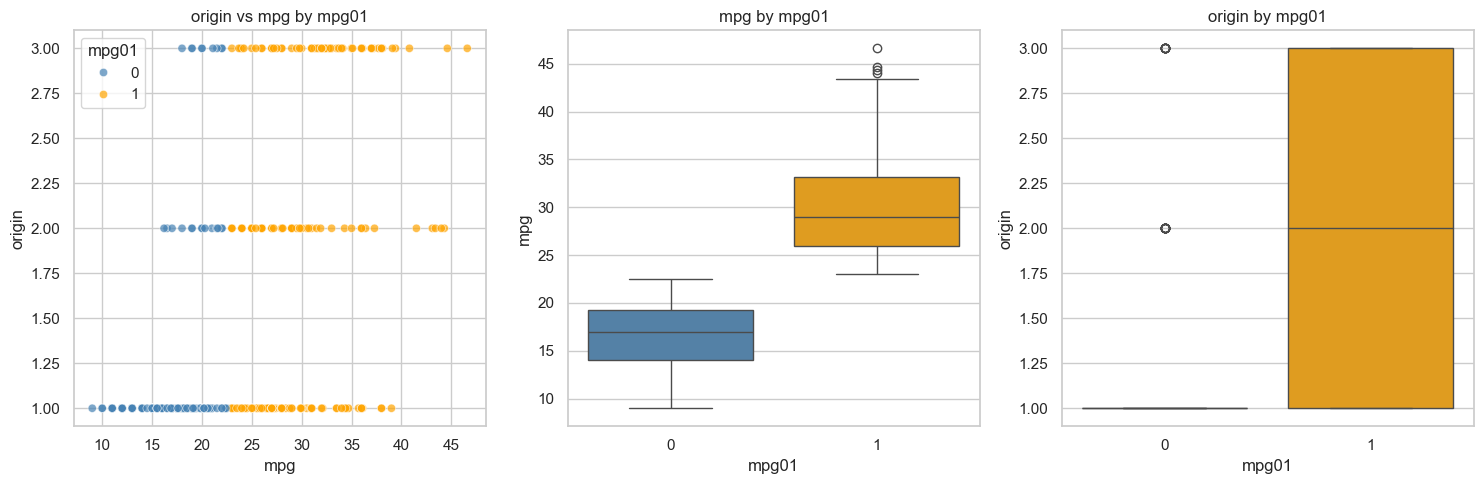

In [12]:
# Create plots to explore potential predictors
sns.set_theme(style="whitegrid", context="notebook")

cols = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "mpg", "origin"]

palette = {0: "steelblue", 1: "orange"}

for i in range(0, len(cols), 2):
    var1, var2 = cols[i], cols[i + 1]

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    sns.scatterplot(
        data=df_auto,
        x=var1, y=var2,
        hue="mpg01",
        palette=palette,
        alpha=0.7,
        ax=axes[0]
    )
    axes[0].set_title(f"{var2} vs {var1} by mpg01")

    sns.boxplot(
        data=df_auto,
        x="mpg01", y=var1,
        hue="mpg01",          
        palette=palette,
        legend=False,       
        ax=axes[1]
    )
    axes[1].set_title(f"{var1} by mpg01")

    sns.boxplot(
        data=df_auto,
        x="mpg01", y=var2,
        hue="mpg01",
        palette=palette,
        legend=False,
        ax=axes[2]
    )
    axes[2].set_title(f"{var2} by mpg01")

    plt.tight_layout()
    plt.show()

From the scatterplot and boxplot, we can tell that weight and horsepower are both useful for predicting mph01. When we graph the two group of mpg01 with different color, we can see that those with lighter weight and smaller horsepower are likely to have mpg01=1, vice versa. But we don't see a clear pattern like this in other variables' plots.  

In [13]:
# Conduct train-test split
X = df_auto.drop(columns=["mpg01"])
y = df_auto["mpg01"]

display(y.value_counts())
display(y.value_counts(normalize=True))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=22
)

print(X_train.shape, X_test.shape)
print(y_train.mean(), y_test.mean())

mpg01
0    196
1    196
Name: count, dtype: int64

mpg01
0    0.5
1    0.5
Name: proportion, dtype: float64

(196, 10) (196, 10)
0.5153061224489796 0.4846938775510204


In [14]:
# Fit LDA model
X_train_lda = X_train[["horsepower", "weight"]]
X_test_lda = X_test[["horsepower", "weight"]]

lda_model = LinearDiscriminantAnalysis()

lda_model.fit(X_train_lda, y_train)

y_pred = lda_model.predict(X_test_lda)

accuracy = accuracy_score(y_test, y_pred)

print(f"LDA test accuracy: {accuracy:.4f}")
print(f"LDA test error: {1 - accuracy:.4f}")

LDA test accuracy: 0.8929
LDA test error: 0.1071


In [15]:
# Fit QDA model
X_train_qda = X_train[["horsepower", "weight"]]
X_test_qda = X_test[["horsepower", "weight"]]

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train_qda, y_train)

y_pred_q = qda_model.predict(X_test_qda)

accuracy_qda = accuracy_score(y_test, y_pred_q)

test_error_qda = 1 - accuracy_qda

print(f"QDA test accuracy: {accuracy_qda:.4f}")
print(f"QDA test error: {test_error_qda:.4f}")

QDA test accuracy: 0.8571
QDA test error: 0.1429


In [16]:
# Fit logit model
X_train_log = X_train[["horsepower", "weight"]]
X_test_log = X_test[["horsepower", "weight"]]

logisticRegr = LogisticRegression(max_iter=500)
logisticRegr.fit(X_train_log, y_train)

y_pred_log = logisticRegr.predict(X_test_log)

accuracy_log = accuracy_score(y_test, y_pred_log)
test_error_log = 1 - accuracy_log

print(f"Logit test accuracy: {accuracy_log:.4f}")
print(f"Logit test error: {test_error_log:.4f}")

Logit test accuracy: 0.9031
Logit test error: 0.0969


In [17]:
# Fit NB model
X_train_nb = X_train[["horsepower", "weight"]]
X_test_nb = X_test[["horsepower", "weight"]]

nb_model = GaussianNB()
nb_model.fit(X_train_nb, y_train)

y_pred_nb = nb_model.predict(X_test_nb)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
test_error_nb = 1 - accuracy_nb

print(f"NB test accuracy: {accuracy_nb:.4f}")
print(f"NB test error: {test_error_nb:.4f}")

NB test accuracy: 0.8673
NB test error: 0.1327


## Another Choice: Function-based implementation

In [18]:
def model_fit(model, X_train, X_test, y_train, y_test, model_name):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    test_error = 1 - accuracy

    print(f"{model_name} test accuracy: {accuracy:.4f}")
    print(f"{model_name} test error: {test_error:.4f}")

    return test_error

# Example usage for LDA:
# lda_error  = model_fit(LinearDiscriminantAnalysis(),
#                               X_train_sub, X_test_sub,
#                               y_train, y_test, "LDA")


Since the logit model has the smallest test error, I would prefer the logit model.  
However, we should be concerned about selecting model by only looking at the test error. Because there might be other factors to consider to determine which is the best model, depending on the context.